# Problem Definition

# Project Overview
Employee turn-over (also known as "employee churn") is a costly problem for companies. The true cost of replacing an employee can often be quite large. A study by the Center for American Progress found that companies typically pay about one-fifth of an employee’s salary to replace that employee, and the cost can significantly increase if executives or highest-paid employees are to be replaced. In other words, the cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.

# Problem Statement
Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance.

# Data Description
In this case study, a HR dataset was sourced from IBM HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. We will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'PHD'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'


JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# End Goal

To understand what is the reason behind employee churn

Build a Machine Learning model to predict employee attrition

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
dataset=pd.read_csv(r"F:\employee_attrition.csv")

In [192]:
pd.set_option("display.max_columns",40)

In [193]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,2061,High,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,1,2062,Very High,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,2064,Medium,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,2065,Very High,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [194]:
dataset["Education"].unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'PHD'],
      dtype=object)

In [195]:
dataset["Education"].replace({'Below College':1,'College':2,'Bachelor':3,'Master':4,'PHD':5},inplace=True)

In [196]:
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [197]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,Medium,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,High,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Very High,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,Very High,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,Low,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,High,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,Very High,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,Medium,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,Very High,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [198]:
dataset["StandardHours"].unique()

array([80], dtype=int64)

In [199]:
dataset.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis=1,inplace=True)

In [200]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Medium,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,High,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Very High,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Very High,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,Low,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,High,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,Very High,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,Medium,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,Very High,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


# Numerical Analysis

In [ ]:
# 1 'Below College'
# 2 'College'
# 3 'Bachelor'
# 4 'Master'
# 5 'PHD'


#JobInvolvement
# 1 'Low'
# 2 'Medium'
# 3 'High'
# 4 'Very High'

C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:

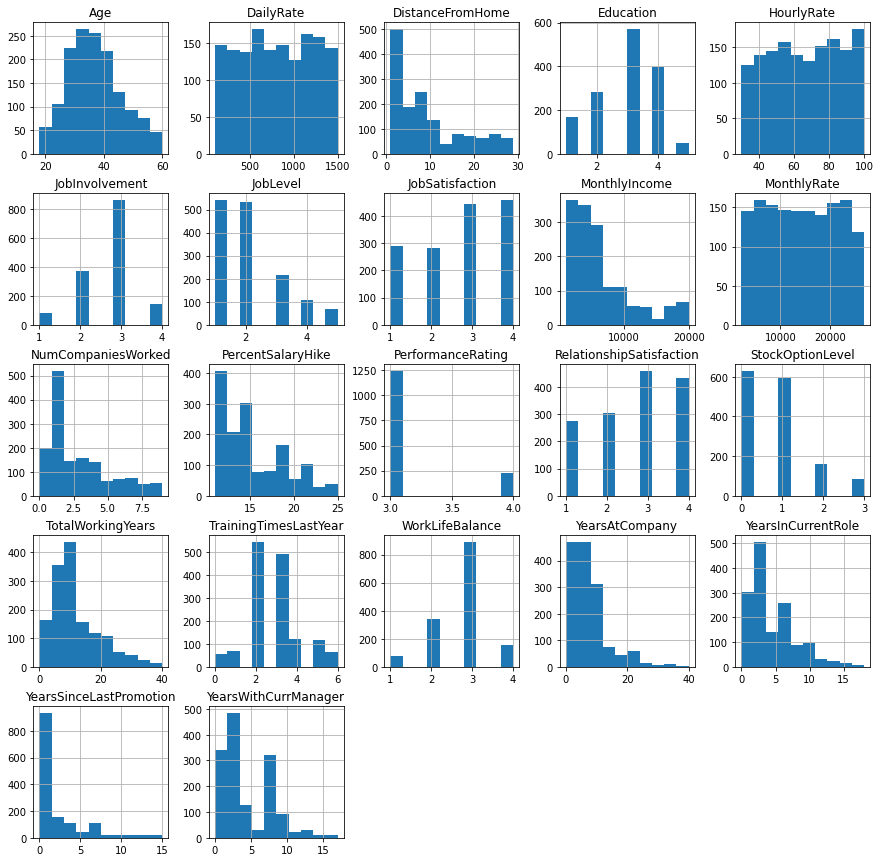

In [17]:
dataset.hist(figsize=(15,15))
plt.show()


In [19]:
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [21]:
dataset["Education"].nunique()

5

In [22]:
categorical_features=[]

In [24]:
for column in dataset.columns:
    if(dataset[column].dtype=="object" or dataset[column].nunique()<10):
        categorical_features.append(column)

In [25]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [27]:
categorical_features.remove("TrainingTimesLastYear")

In [28]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [26]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Medium,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,High,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Very High,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Very High,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,Low,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,High,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,Very High,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,Medium,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,Very High,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [29]:
dataset_categorical=dataset[categorical_features]

In [30]:
dataset_categorical

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,2,Life Sciences,Medium,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,No,Travel_Frequently,Research & Development,1,Life Sciences,High,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,Yes,Travel_Rarely,Research & Development,2,Other,Very High,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,No,Travel_Frequently,Research & Development,4,Life Sciences,Very High,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,No,Travel_Rarely,Research & Development,1,Medical,Low,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,2,Medical,High,Male,4,2,Laboratory Technician,4,Married,No,3,3,1,3
1466,No,Travel_Rarely,Research & Development,1,Medical,Very High,Male,2,3,Healthcare Representative,1,Married,No,3,1,1,3
1467,No,Travel_Rarely,Research & Development,3,Life Sciences,Medium,Male,4,2,Manufacturing Director,2,Married,Yes,4,2,1,3
1468,No,Travel_Frequently,Sales,3,Medical,Very High,Male,2,2,Sales Executive,2,Married,No,3,4,0,2


In [31]:
numerical_features=[]

In [32]:
for column in dataset.columns:
    if(dataset[column].nunique()>10):
        numerical_features.append(column)

In [35]:
numerical_features.append("TrainingTimesLastYear")

In [36]:
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'TrainingTimesLastYear']

In [37]:
dataset_numerical=dataset[numerical_features]

In [38]:
dataset_numerical

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
0,41,1102,1,94,5993,19479,11,8,6,4,0,5,0
1,49,279,8,61,5130,24907,23,10,10,7,1,7,3
2,37,1373,2,92,2090,2396,15,7,0,0,0,0,3
3,33,1392,3,56,2909,23159,11,8,8,7,3,0,3
4,27,591,2,40,3468,16632,12,6,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,17,17,5,2,0,3,3
1466,39,613,6,42,9991,21457,15,9,7,7,1,7,5
1467,27,155,4,87,6142,5174,20,6,6,2,0,3,0
1468,49,1023,2,63,5390,13243,14,17,9,6,0,8,3


In [39]:
dataset_categorical

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,2,Life Sciences,Medium,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,No,Travel_Frequently,Research & Development,1,Life Sciences,High,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,Yes,Travel_Rarely,Research & Development,2,Other,Very High,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,No,Travel_Frequently,Research & Development,4,Life Sciences,Very High,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,No,Travel_Rarely,Research & Development,1,Medical,Low,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,2,Medical,High,Male,4,2,Laboratory Technician,4,Married,No,3,3,1,3
1466,No,Travel_Rarely,Research & Development,1,Medical,Very High,Male,2,3,Healthcare Representative,1,Married,No,3,1,1,3
1467,No,Travel_Rarely,Research & Development,3,Life Sciences,Medium,Male,4,2,Manufacturing Director,2,Married,Yes,4,2,1,3
1468,No,Travel_Frequently,Sales,3,Medical,Very High,Male,2,2,Sales Executive,2,Married,No,3,4,0,2


In [34]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Medium,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,High,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Very High,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Very High,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,Low,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,High,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,Very High,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,Medium,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,Very High,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [43]:
for col in dataset_numerical.columns:
    print("==================="+col+"=======================")
    display(dataset_numerical[col].describe())

===================Age=======================


count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

===================DailyRate=======================


count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

===================DistanceFromHome=======================


count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

===================HourlyRate=======================


count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

===================MonthlyIncome=======================


count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

===================MonthlyRate=======================


count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

===================PercentSalaryHike=======================


count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

===================TotalWorkingYears=======================


count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

===================YearsAtCompany=======================


count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

===================YearsInCurrentRole=======================


count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

===================YearsSinceLastPromotion=======================


count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

===================YearsWithCurrManager=======================


count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

===================TrainingTimesLastYear=======================


count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

In [44]:
dataset_numerical.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


In [46]:
dataset_numerical.shape

(1470, 13)

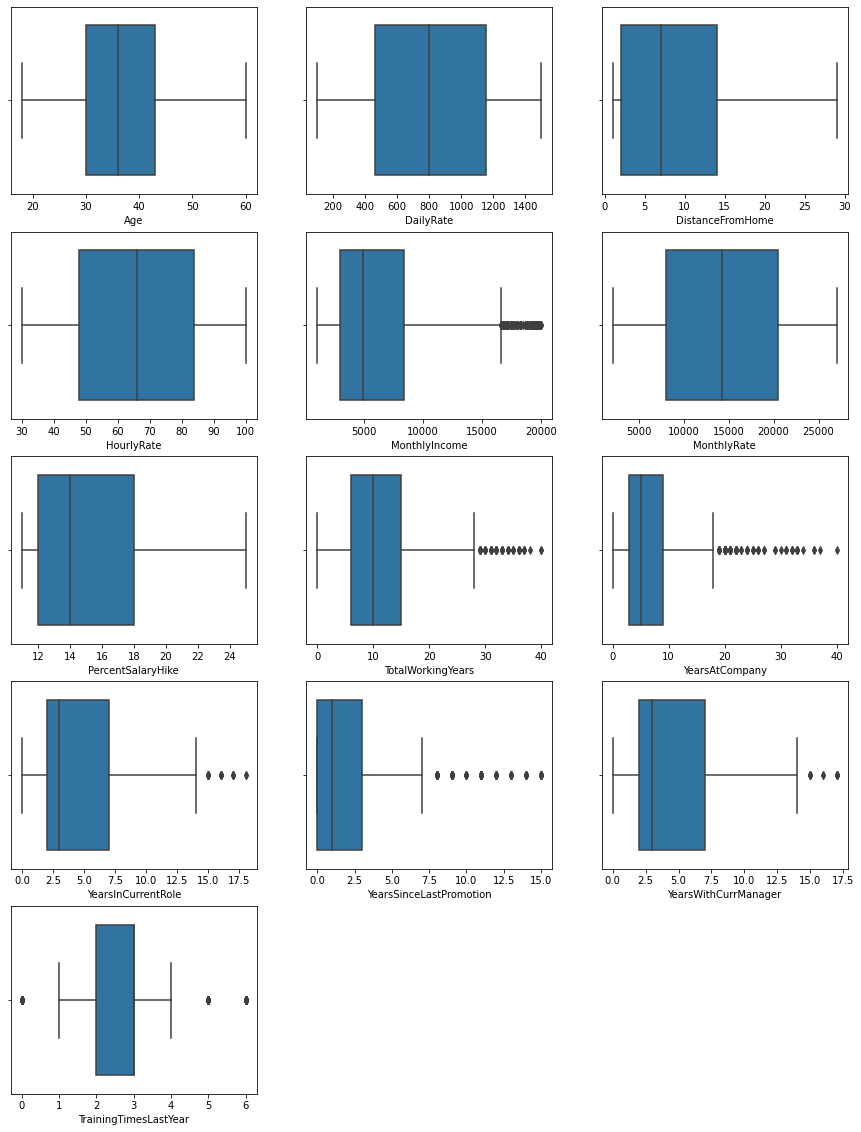

In [53]:
plt.figure(figsize=(15,20))
for i,col in enumerate(dataset_numerical.columns,1):
    plt.subplot(5,3,i)
    sns.boxplot(dataset_numerical[col])

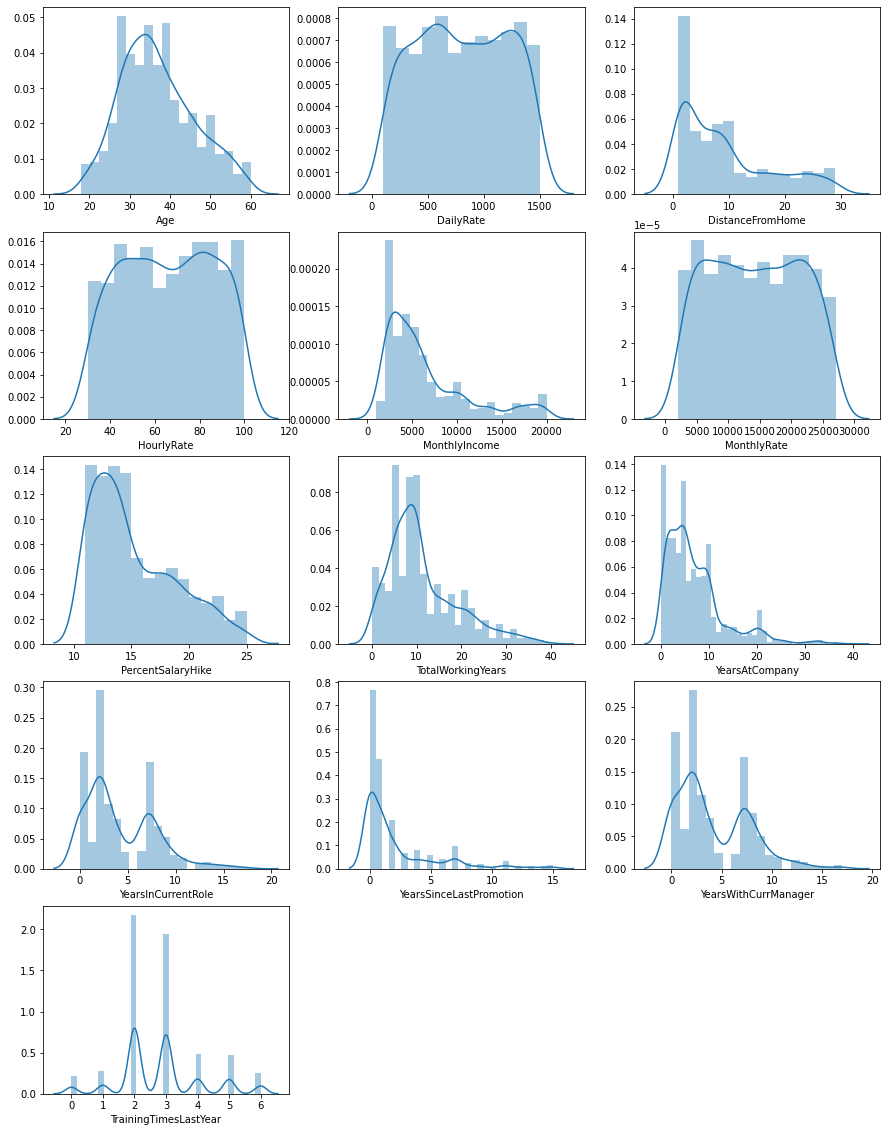

In [54]:
plt.figure(figsize=(15,20))
for i,col in enumerate(dataset_numerical.columns,1):
    plt.subplot(5,3,i)
    sns.distplot(dataset_numerical[col])

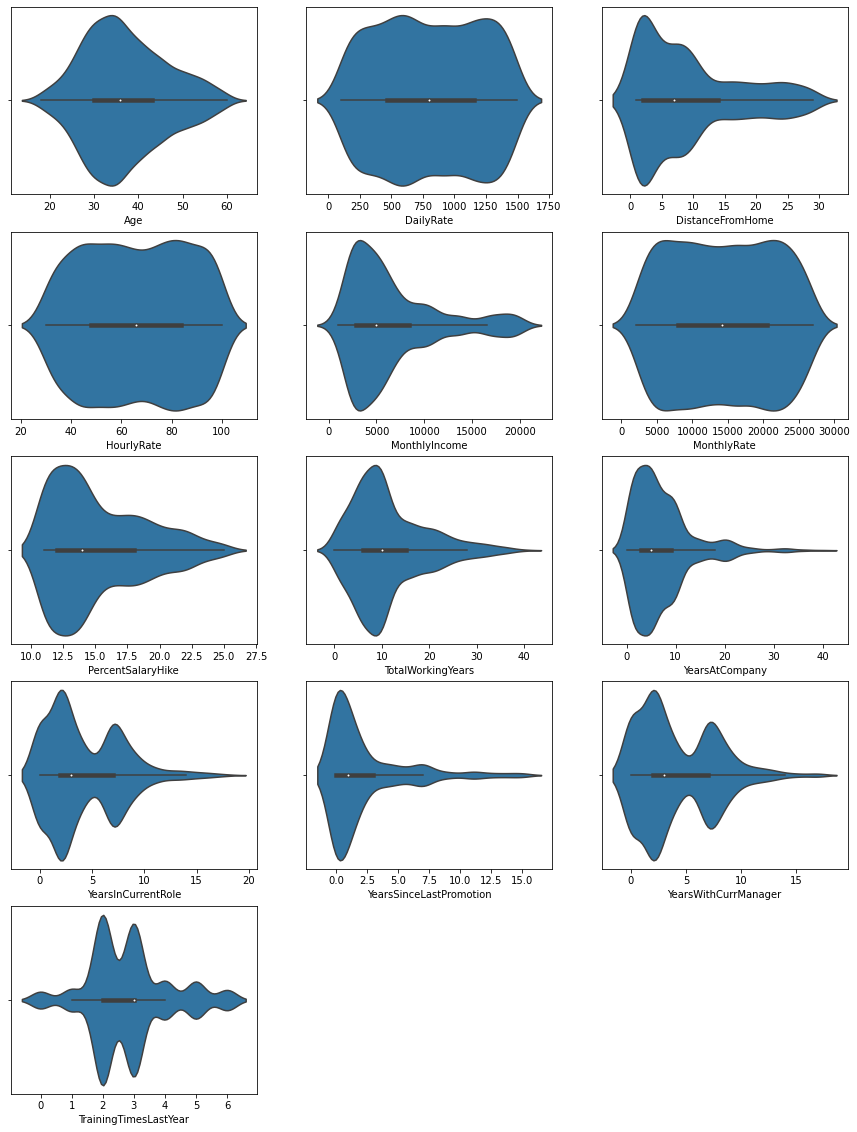

In [55]:
plt.figure(figsize=(15,20))
for i,col in enumerate(dataset_numerical.columns,1):
    plt.subplot(5,3,i)
    sns.violinplot(dataset_numerical[col])

In [56]:
for col in dataset_categorical.columns:
    print("=================="+col+"=======================")
    display(dataset_categorical[col].value_counts())

==================Attrition=======================


No     1233
Yes     237
Name: Attrition, dtype: int64

==================BusinessTravel=======================


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

==================Department=======================


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

==================Education=======================


3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

==================EducationField=======================


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

==================EnvironmentSatisfaction=======================


High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64

==================Gender=======================


Male      882
Female    588
Name: Gender, dtype: int64

==================JobInvolvement=======================


3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

==================JobLevel=======================


1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

==================JobRole=======================


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

==================JobSatisfaction=======================


4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

==================MaritalStatus=======================


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

==================OverTime=======================


No     1054
Yes     416
Name: OverTime, dtype: int64

==================PerformanceRating=======================


3    1244
4     226
Name: PerformanceRating, dtype: int64

==================RelationshipSatisfaction=======================


3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

==================StockOptionLevel=======================


0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

==================WorkLifeBalance=======================


3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

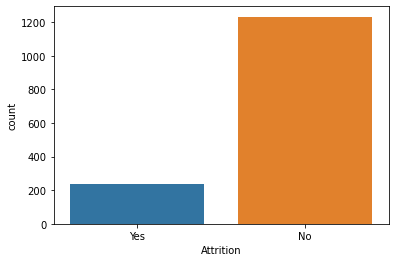

In [57]:
sns.countplot(dataset["Attrition"])

In [58]:
dataset_categorical.shape

(1470, 17)

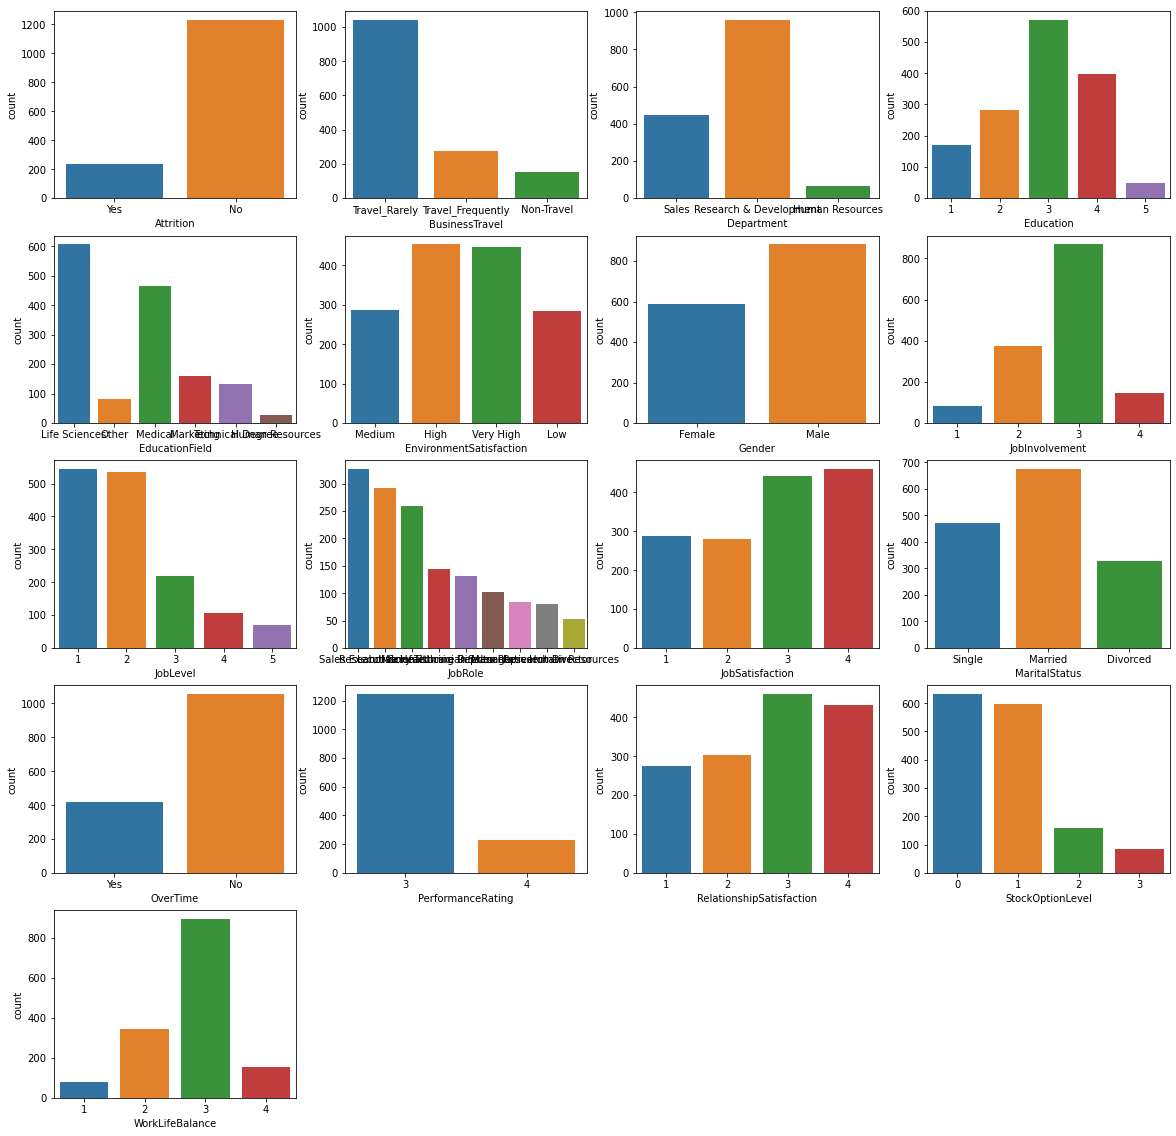

In [60]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_categorical.columns,1):
    plt.subplot(5,4,i)
    sns.countplot(dataset_categorical[col])

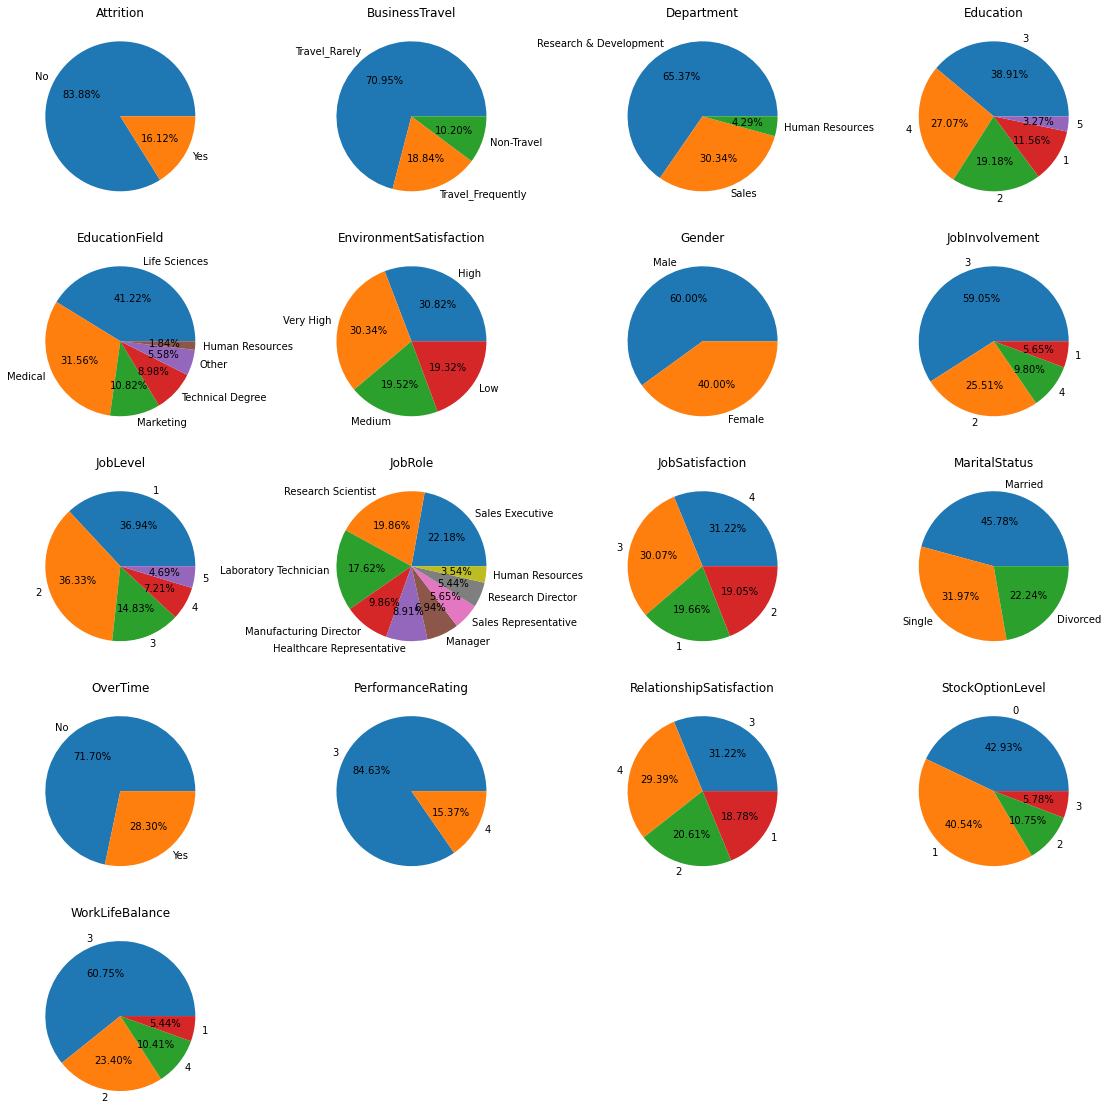

In [63]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_categorical.columns,1):
    plt.subplot(5,4,i)
    fdt=dataset_categorical[col].value_counts()
    plt.pie(fdt.values,labels=fdt.index,autopct="%.2f%%")
    plt.title(col)

### Target vs Categorical

In [68]:
for col in dataset_categorical:
    
    display(pd.crosstab(dataset_categorical[col],dataset_categorical["Attrition"]))

Attrition,No,Yes
Attrition,,
No,1233,0
Yes,0,237


Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


Attrition,No,Yes
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


Attrition,No,Yes
EnvironmentSatisfaction,,
High,391,62
Low,212,72
Medium,244,43
Very High,386,60


Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


Attrition,No,Yes
JobLevel,,
1,400,143
2,482,52
3,186,32
4,101,5
5,64,5


Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


Attrition,No,Yes
JobSatisfaction,,
1,223,66
2,234,46
3,369,73
4,407,52


Attrition,No,Yes
MaritalStatus,,
Divorced,294,33
Married,589,84
Single,350,120


Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


Attrition,No,Yes
PerformanceRating,,
3,1044,200
4,189,37


Attrition,No,Yes
RelationshipSatisfaction,,
1,219,57
2,258,45
3,388,71
4,368,64


Attrition,No,Yes
StockOptionLevel,,
0,477,154
1,540,56
2,146,12
3,70,15


Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


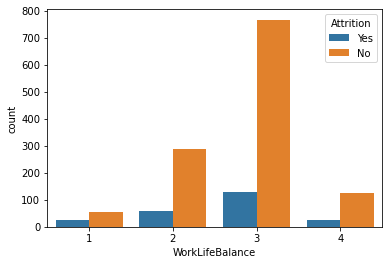

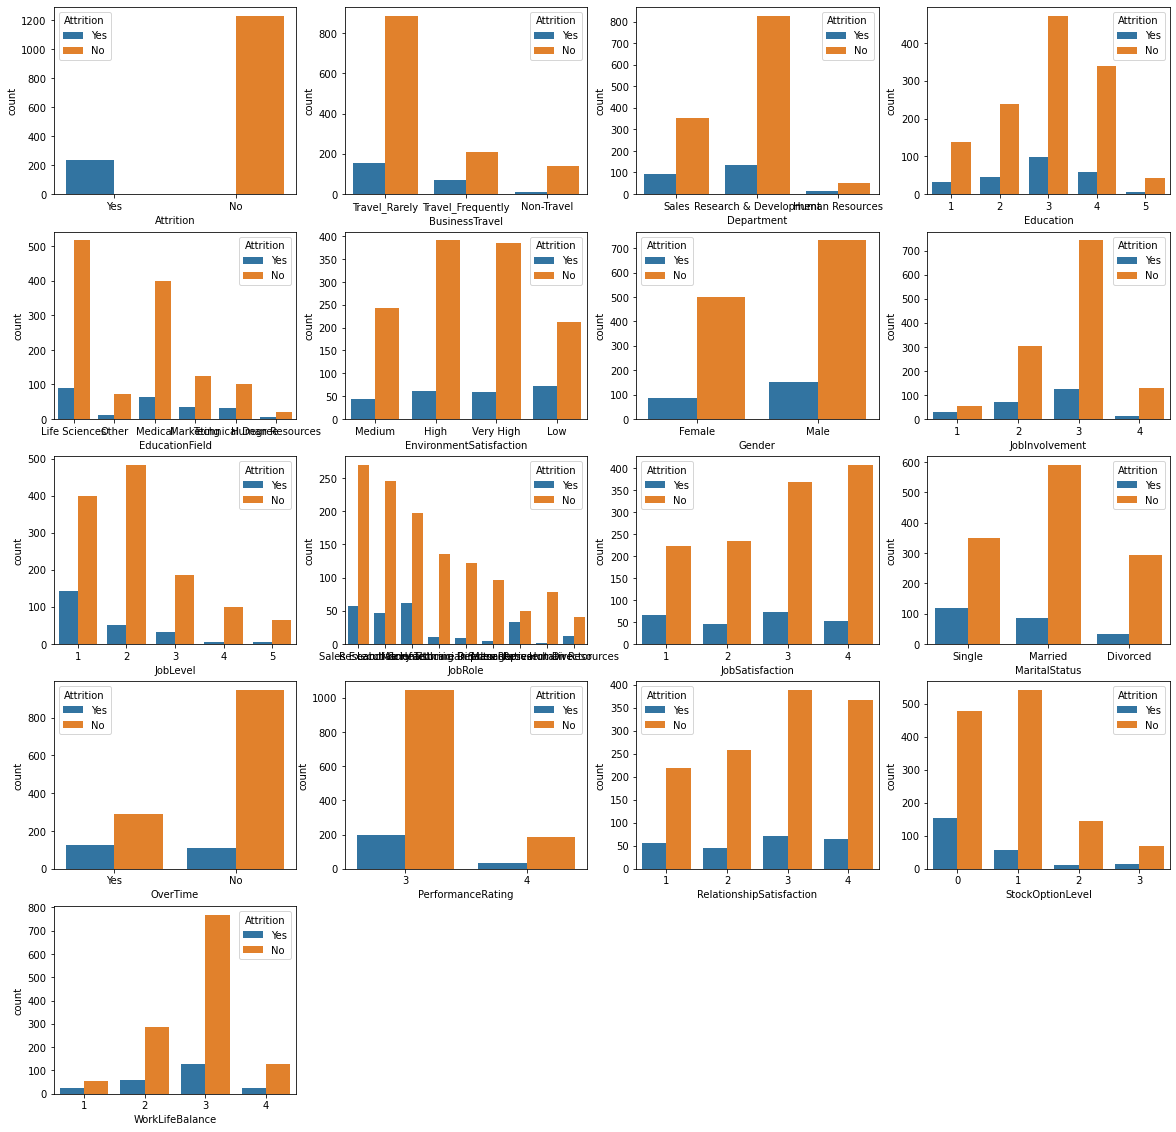

In [76]:
plt.figure(figsize=(20,20))

for i,col in enumerate(dataset_categorical,1):
    plt.subplot(5,4,i)
    sns.countplot(x=dataset_categorical[col],hue=dataset_categorical["Attrition"])

In [8]:
categorical_features=[]
for col in dataset.columns:
    if(dataset[col].dtype=="object" or dataset[col].nunique()<10):
        categorical_features.append(col)

In [9]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [10]:
dataset_categorical=dataset[categorical_features]

In [11]:
dataset_categorical

,Attrition,BusinessTravel,Department,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,1,Medium,Female,3,2,Sales Executive,4,Single,Y,Yes,3,1,80,0,0,1
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,1,High,Male,2,2,Research Scientist,2,Married,Y,No,4,4,80,1,3,3
2,Yes,Travel_Rarely,Research & Development,College,Other,1,Very High,Male,2,1,Laboratory Technician,3,Single,Y,Yes,3,2,80,0,3,3
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,1,Very High,Female,3,1,Research Scientist,3,Married,Y,Yes,3,3,80,0,3,3
4,No,Travel_Rarely,Research & Development,Below College,Medical,1,Low,Male,3,1,Laboratory Technician,2,Married,Y,No,3,4,80,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,College,Medical,1,High,Male,4,2,Laboratory Technician,4,Married,Y,No,3,3,80,1,3,3
1466,No,Travel_Rarely,Research & Development,Below College,Medical,1,Very High,Male,2,3,Healthcare Representative,1,Married,Y,No,3,1,80,1,5,3
1467,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,1,Medium,Male,4,2,Manufacturing Director,2,Married,Y,Yes,4,2,80,1,0,3
1468,No,Travel_Frequently,Sales,Bachelor,Medical,1,Very High,Male,2,2,Sales Executive,2,Married,Y,No,3,4,80,0,3,2


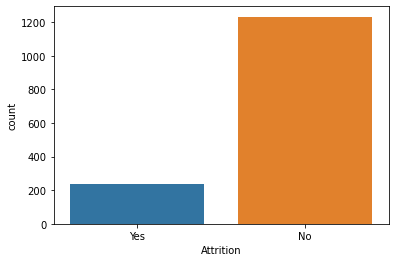

In [12]:
sns.countplot(dataset_categorical["Attrition"])

In [13]:
dataset_categorical

,Attrition,BusinessTravel,Department,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,1,Medium,Female,3,2,Sales Executive,4,Single,Y,Yes,3,1,80,0,0,1
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,1,High,Male,2,2,Research Scientist,2,Married,Y,No,4,4,80,1,3,3
2,Yes,Travel_Rarely,Research & Development,College,Other,1,Very High,Male,2,1,Laboratory Technician,3,Single,Y,Yes,3,2,80,0,3,3
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,1,Very High,Female,3,1,Research Scientist,3,Married,Y,Yes,3,3,80,0,3,3
4,No,Travel_Rarely,Research & Development,Below College,Medical,1,Low,Male,3,1,Laboratory Technician,2,Married,Y,No,3,4,80,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,College,Medical,1,High,Male,4,2,Laboratory Technician,4,Married,Y,No,3,3,80,1,3,3
1466,No,Travel_Rarely,Research & Development,Below College,Medical,1,Very High,Male,2,3,Healthcare Representative,1,Married,Y,No,3,1,80,1,5,3
1467,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,1,Medium,Male,4,2,Manufacturing Director,2,Married,Y,Yes,4,2,80,1,0,3
1468,No,Travel_Frequently,Sales,Bachelor,Medical,1,Very High,Male,2,2,Sales Executive,2,Married,Y,No,3,4,80,0,3,2


In [14]:
list(enumerate(dataset_categorical.columns,1))

[(1, 'Attrition'),
 (2, 'BusinessTravel'),
 (3, 'Department'),
 (4, 'Education'),
 (5, 'EducationField'),
 (6, 'EmployeeCount'),
 (7, 'EnvironmentSatisfaction'),
 (8, 'Gender'),
 (9, 'JobInvolvement'),
 (10, 'JobLevel'),
 (11, 'JobRole'),
 (12, 'JobSatisfaction'),
 (13, 'MaritalStatus'),
 (14, 'Over18'),
 (15, 'OverTime'),
 (16, 'PerformanceRating'),
 (17, 'RelationshipSatisfaction'),
 (18, 'StandardHours'),
 (19, 'StockOptionLevel'),
 (20, 'TrainingTimesLastYear'),
 (21, 'WorkLifeBalance')]

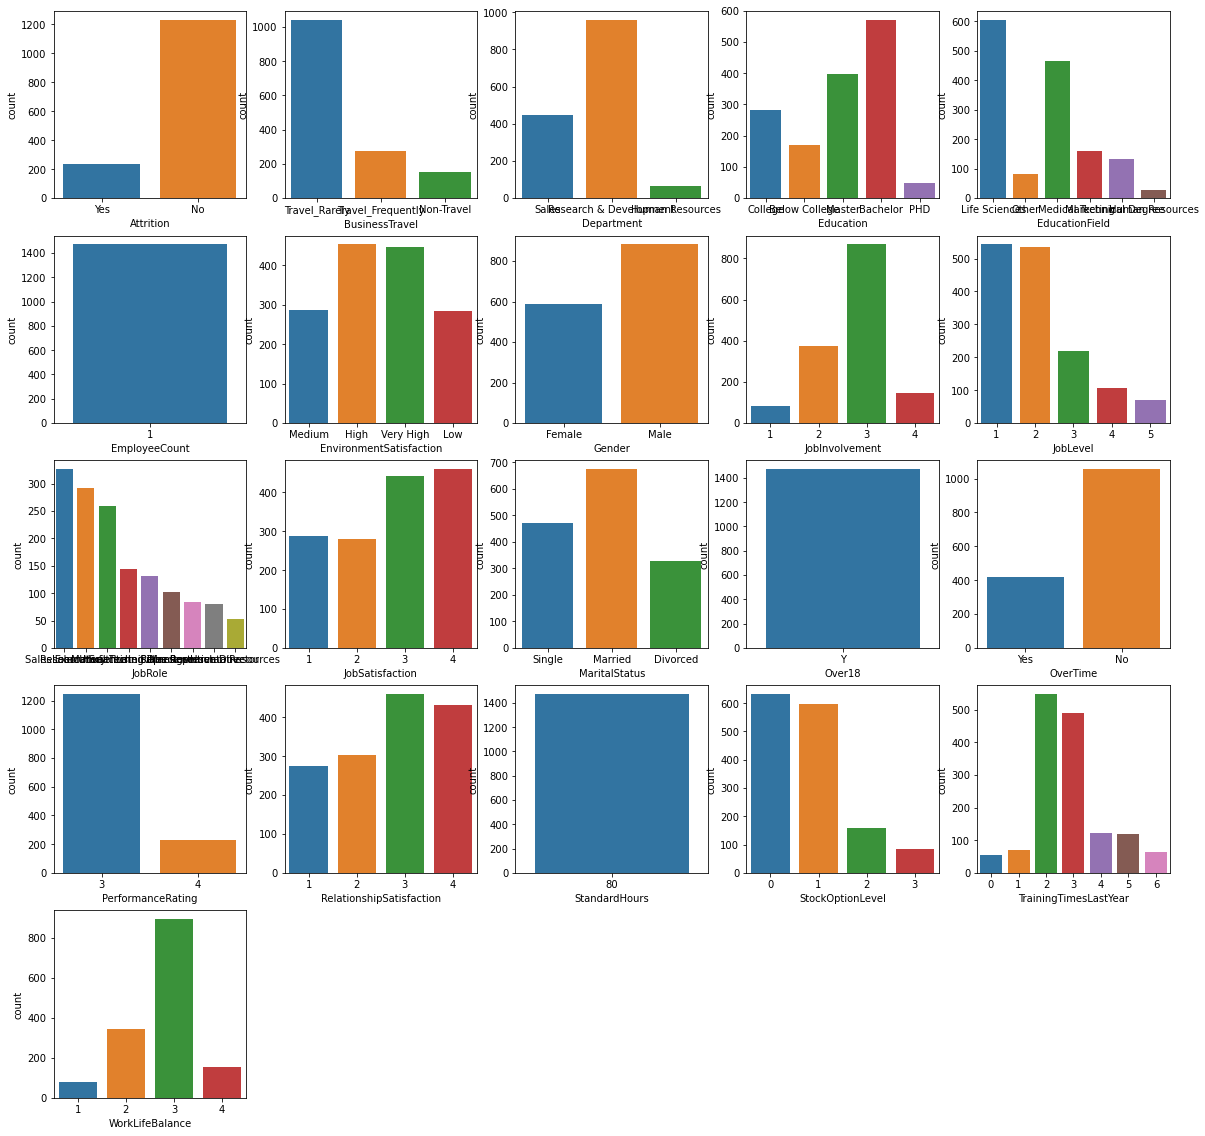

In [15]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_categorical.columns,1):
    plt.subplot(5,5,i)
    sns.countplot(dataset_categorical[col])

([<matplotlib.patches.Wedge at 0x1ebfa122548>,
 [Text(-0.9618916732177651, 0.5336332157899547, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.5246681853915082, 0.29107266315815705, '84%'),
  Text(0.5246681853915082, -0.2910726631581571, '16%')])

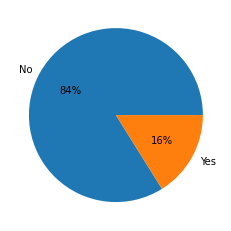

In [16]:
plt.pie(dataset_categorical["Attrition"].value_counts(),labels=dataset_categorical["Attrition"].value_counts().index,autopct="%1.f%%")

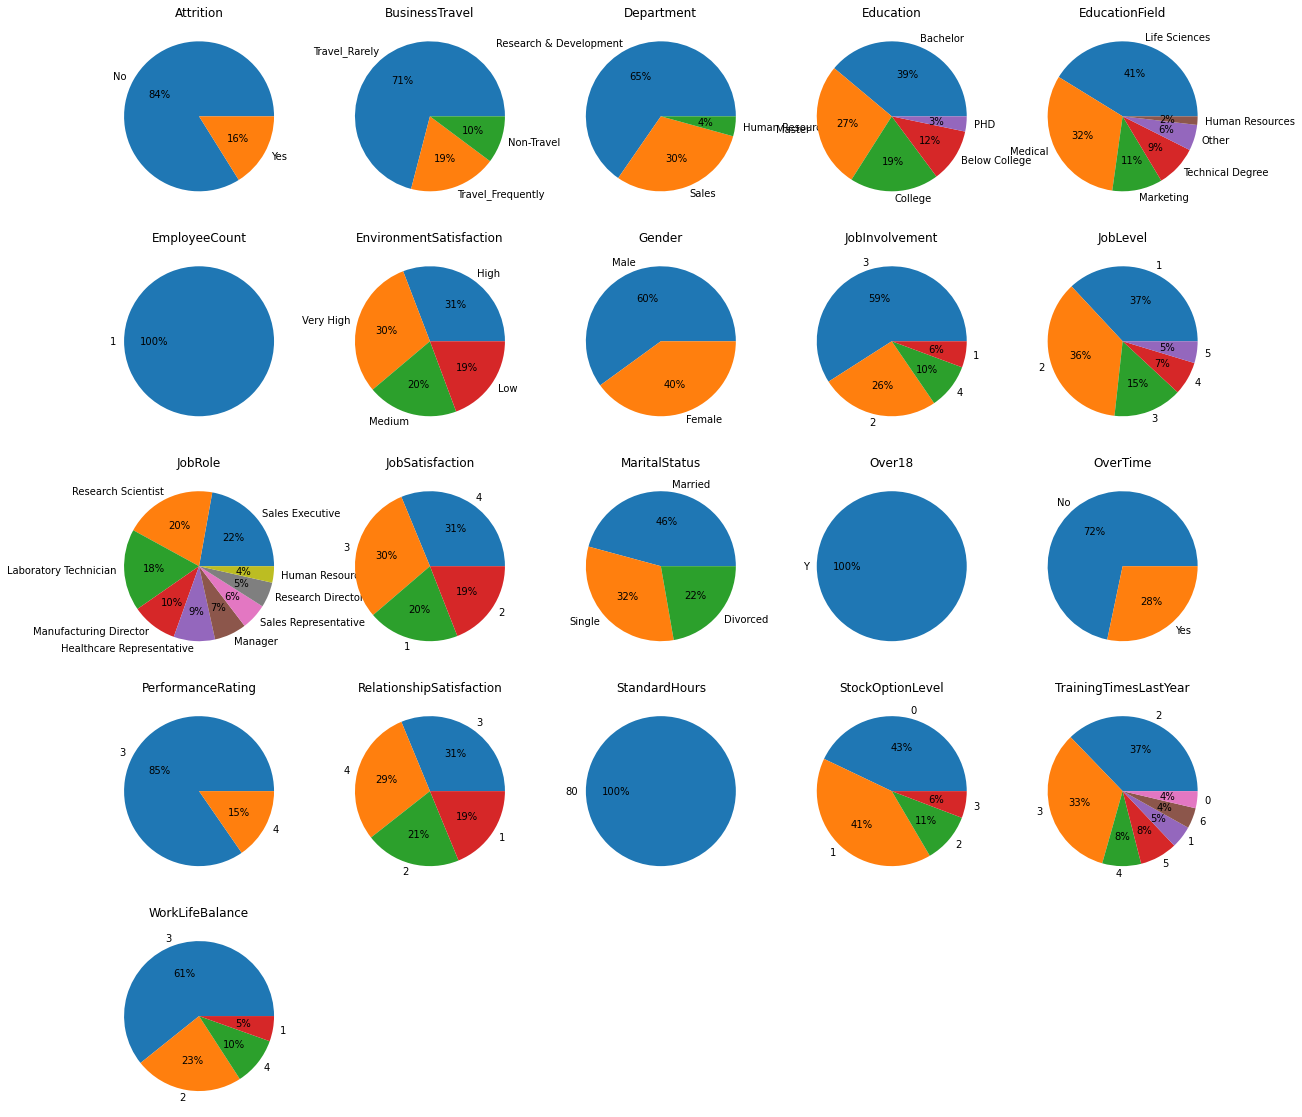

In [50]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_categorical.columns,1):
    plt.subplot(5,5,i)
    plt.pie(dataset_categorical[col].value_counts(),labels=dataset_categorical[col].value_counts().index,autopct="%1.f%%")
    plt.title(col)

# Target vs Categorical Data

In [17]:
dataset_categorical["EnvironmentSatisfaction"]

0          Medium
1            High
2       Very High
3       Very High
4             Low
          ...    
1465         High
1466    Very High
1467       Medium
1468    Very High
1469       Medium
Name: EnvironmentSatisfaction, Length: 1470, dtype: object

In [18]:
pd.crosstab(dataset_categorical["EnvironmentSatisfaction"],dataset_categorical["Attrition"])

Attrition,No,Yes
EnvironmentSatisfaction,,
High,391,62
Low,212,72
Medium,244,43
Very High,386,60


In [43]:
for col in dataset_categorical.columns:
    print("==============================="+col+"=================================")
    display(pd.crosstab(dataset_categorical[col],dataset_categorical["Attrition"]))

===============================Attrition=================================


Attrition,No,Yes
Attrition,,
No,1233,0
Yes,0,237


===============================BusinessTravel=================================


Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


===============================Department=================================


Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


===============================Education=================================


Attrition,No,Yes
Education,,
Bachelor,473,99
Below College,139,31
College,238,44
Master,340,58
PHD,43,5


===============================EducationField=================================


Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


===============================EmployeeCount=================================


Attrition,No,Yes
EmployeeCount,,
1,1233,237


===============================EnvironmentSatisfaction=================================


Attrition,No,Yes
EnvironmentSatisfaction,,
High,391,62
Low,212,72
Medium,244,43
Very High,386,60


===============================Gender=================================


Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


===============================JobInvolvement=================================


Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


===============================JobLevel=================================


Attrition,No,Yes
JobLevel,,
1,400,143
2,482,52
3,186,32
4,101,5
5,64,5


===============================JobRole=================================


Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


===============================JobSatisfaction=================================


Attrition,No,Yes
JobSatisfaction,,
1,223,66
2,234,46
3,369,73
4,407,52


===============================MaritalStatus=================================


Attrition,No,Yes
MaritalStatus,,
Divorced,294,33
Married,589,84
Single,350,120


===============================Over18=================================


Attrition,No,Yes
Over18,,
Y,1233,237


===============================OverTime=================================


Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


===============================PerformanceRating=================================


Attrition,No,Yes
PerformanceRating,,
3,1044,200
4,189,37


===============================RelationshipSatisfaction=================================


Attrition,No,Yes
RelationshipSatisfaction,,
1,219,57
2,258,45
3,388,71
4,368,64


===============================StandardHours=================================


Attrition,No,Yes
StandardHours,,
80,1233,237


===============================StockOptionLevel=================================


Attrition,No,Yes
StockOptionLevel,,
0,477,154
1,540,56
2,146,12
3,70,15


===============================TrainingTimesLastYear=================================


Attrition,No,Yes
TrainingTimesLastYear,,
0,39,15
1,62,9
2,449,98
3,422,69
4,97,26
5,105,14
6,59,6


===============================WorkLifeBalance=================================


Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


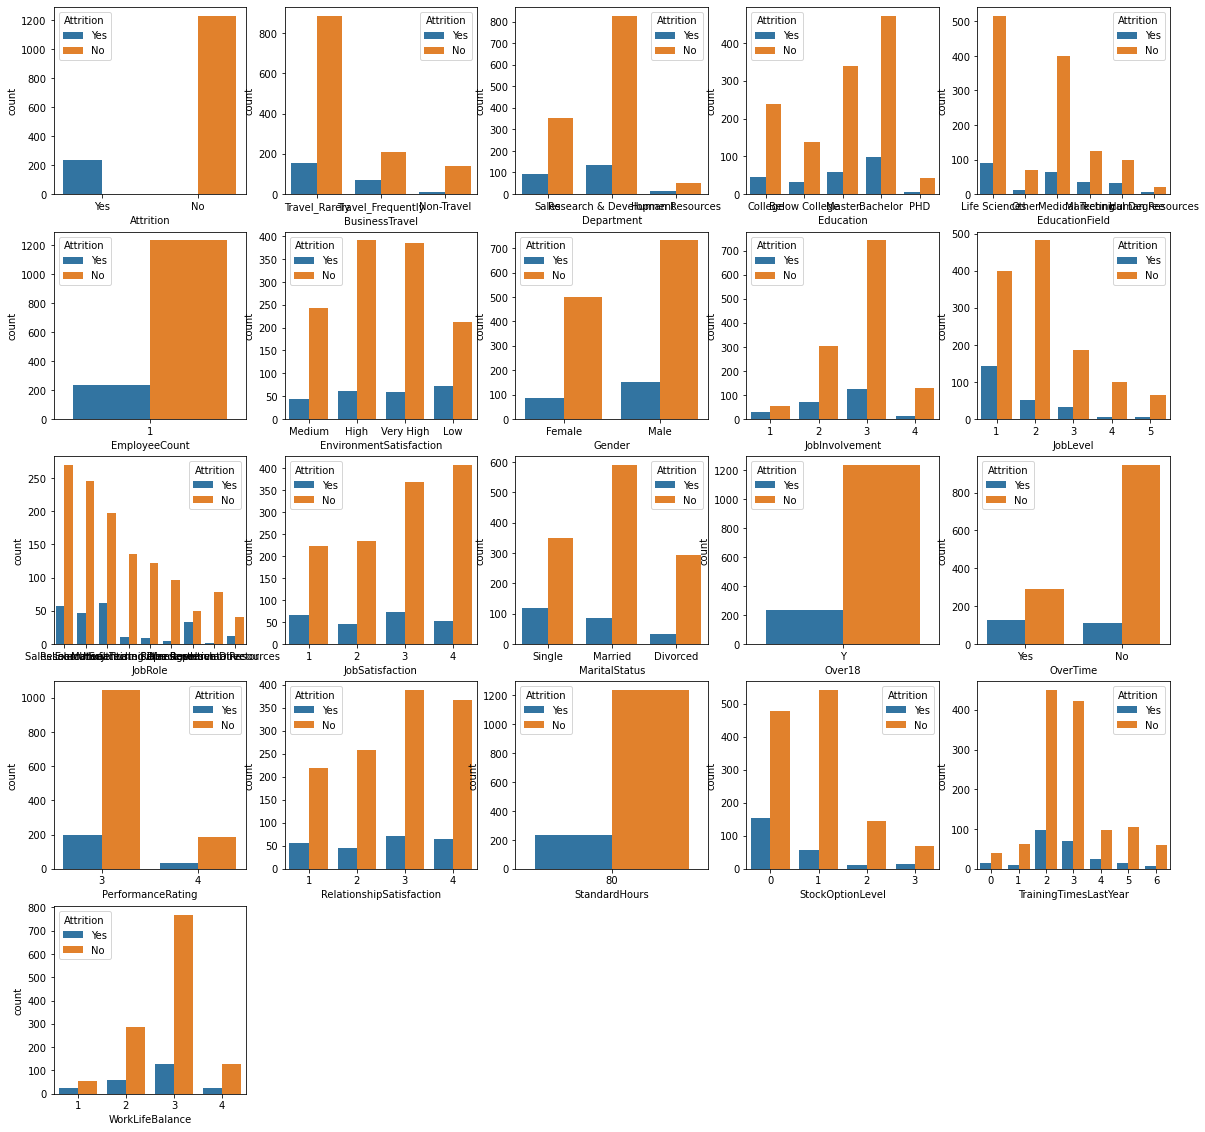

In [47]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_categorical.columns,1):
    plt.subplot(5,5,i)
    sns.countplot(dataset_categorical[col],hue=dataset_categorical["Attrition"])

In [19]:
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [20]:
numerical_features=[]

In [21]:
for col in dataset.columns:
    if(dataset[col].dtype!="object" and dataset[col].nunique()>10):
        numerical_features.append(col)

In [22]:
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [23]:
dataset_numerical=dataset[numerical_features]

In [24]:
dataset_numerical

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,94,5993,19479,11,8,6,4,0,5
1,49,279,8,2,61,5130,24907,23,10,10,7,1,7
2,37,1373,2,4,92,2090,2396,15,7,0,0,0,0
3,33,1392,3,5,56,2909,23159,11,8,8,7,3,0
4,27,591,2,7,40,3468,16632,12,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2061,41,2571,12290,17,17,5,2,0,3
1466,39,613,6,2062,42,9991,21457,15,9,7,7,1,7
1467,27,155,4,2064,87,6142,5174,20,6,6,2,0,3
1468,49,1023,2,2065,63,5390,13243,14,17,9,6,0,8


In [25]:
dataset_numerical.describe()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1024.865306,65.891156,6502.931293,14313.103401,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,602.024335,20.329428,4707.956783,7117.786044,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,30.000000,1009.000000,2094.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,491.250000,48.000000,2911.000000,8047.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1020.500000,66.000000,4919.000000,14235.500000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1555.750000,83.750000,8379.000000,20461.500000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,2068.000000,100.000000,19999.000000,26999.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000


In [59]:
for col in dataset_numerical.columns:
    print("==============================="+col+"=================================")
    display(dataset_numerical[col].describe())

===============================Age=================================


count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

===============================DailyRate=================================


count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

===============================DistanceFromHome=================================


count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

===============================EmployeeNumber=================================


count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64

===============================HourlyRate=================================


count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

===============================MonthlyIncome=================================


count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

===============================MonthlyRate=================================


count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

===============================PercentSalaryHike=================================


count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

===============================TotalWorkingYears=================================


count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

===============================YearsAtCompany=================================


count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

===============================YearsInCurrentRole=================================


count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

===============================YearsSinceLastPromotion=================================


count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

===============================YearsWithCurrManager=================================


count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

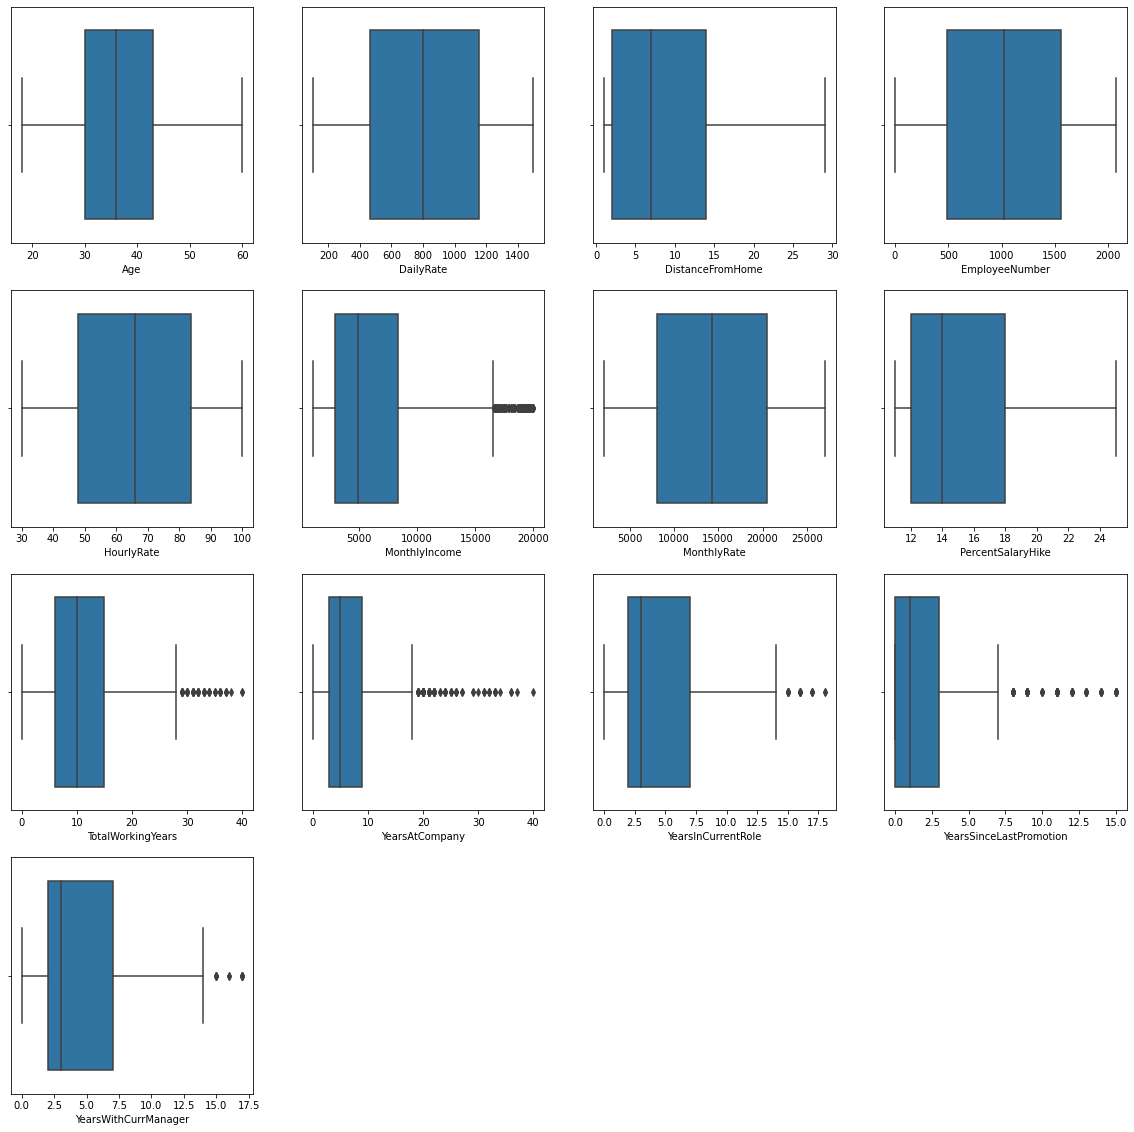

In [61]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_numerical.columns,1):
    plt.subplot(4,4,i)
    sns.boxplot(dataset_numerical[col])

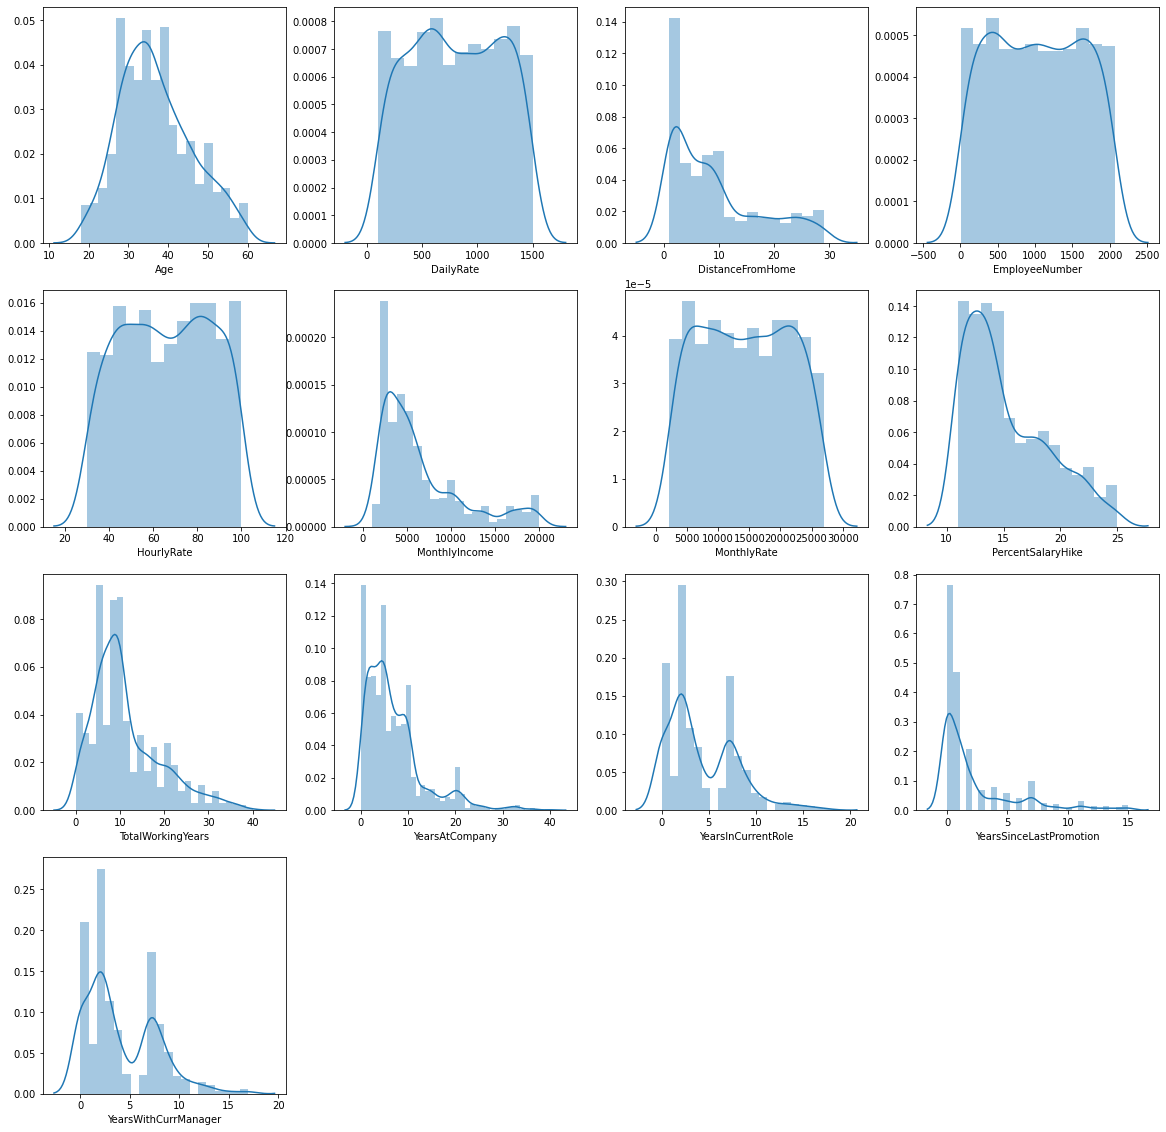

In [62]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_numerical.columns,1):
    plt.subplot(4,4,i)
    sns.distplot(dataset_numerical[col])

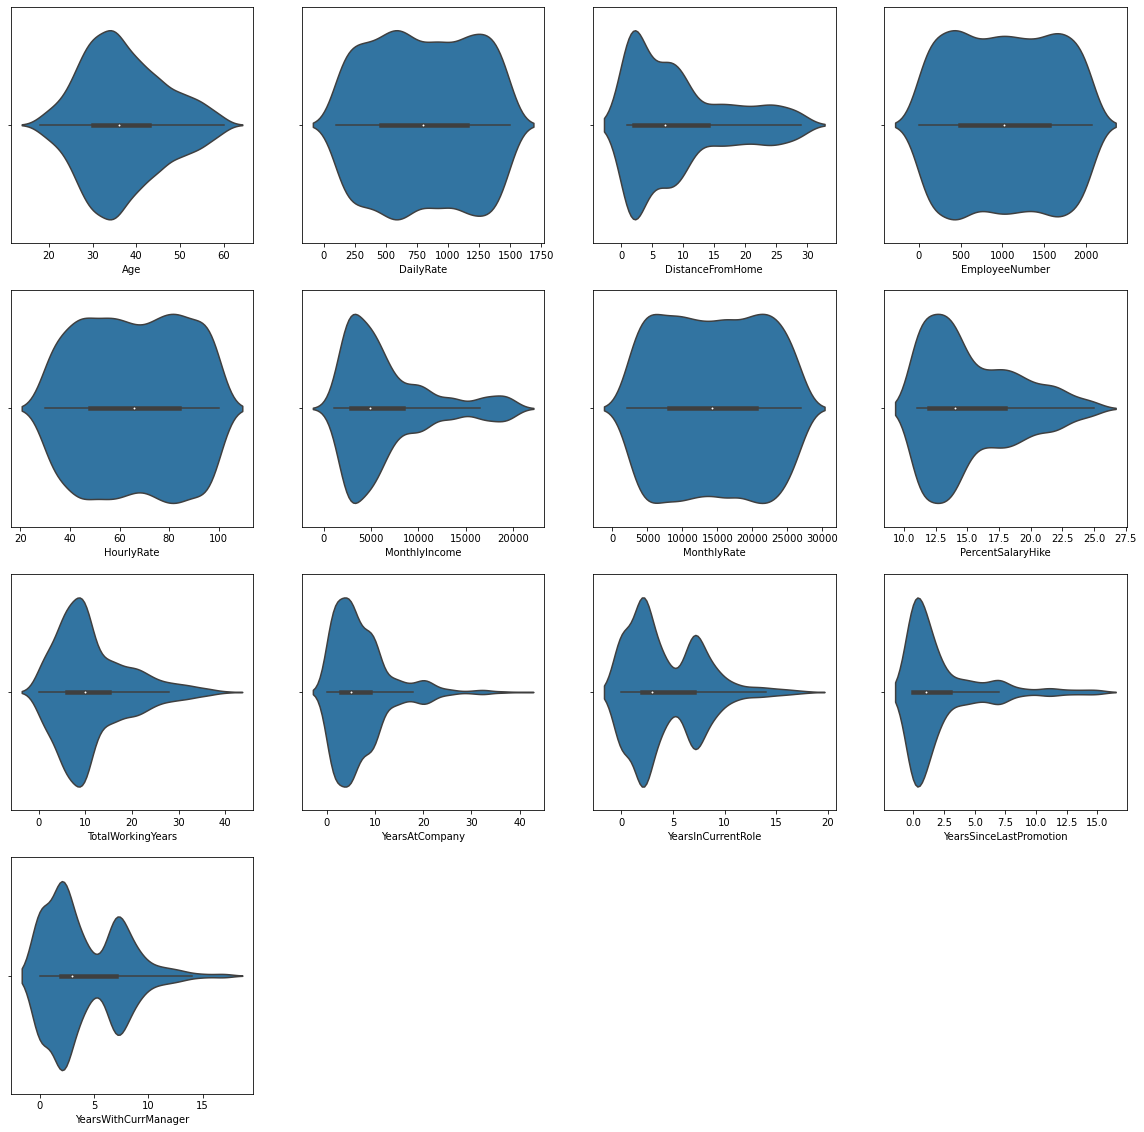

In [63]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_numerical.columns,1):
    plt.subplot(4,4,i)
    sns.violinplot(dataset_numerical[col])

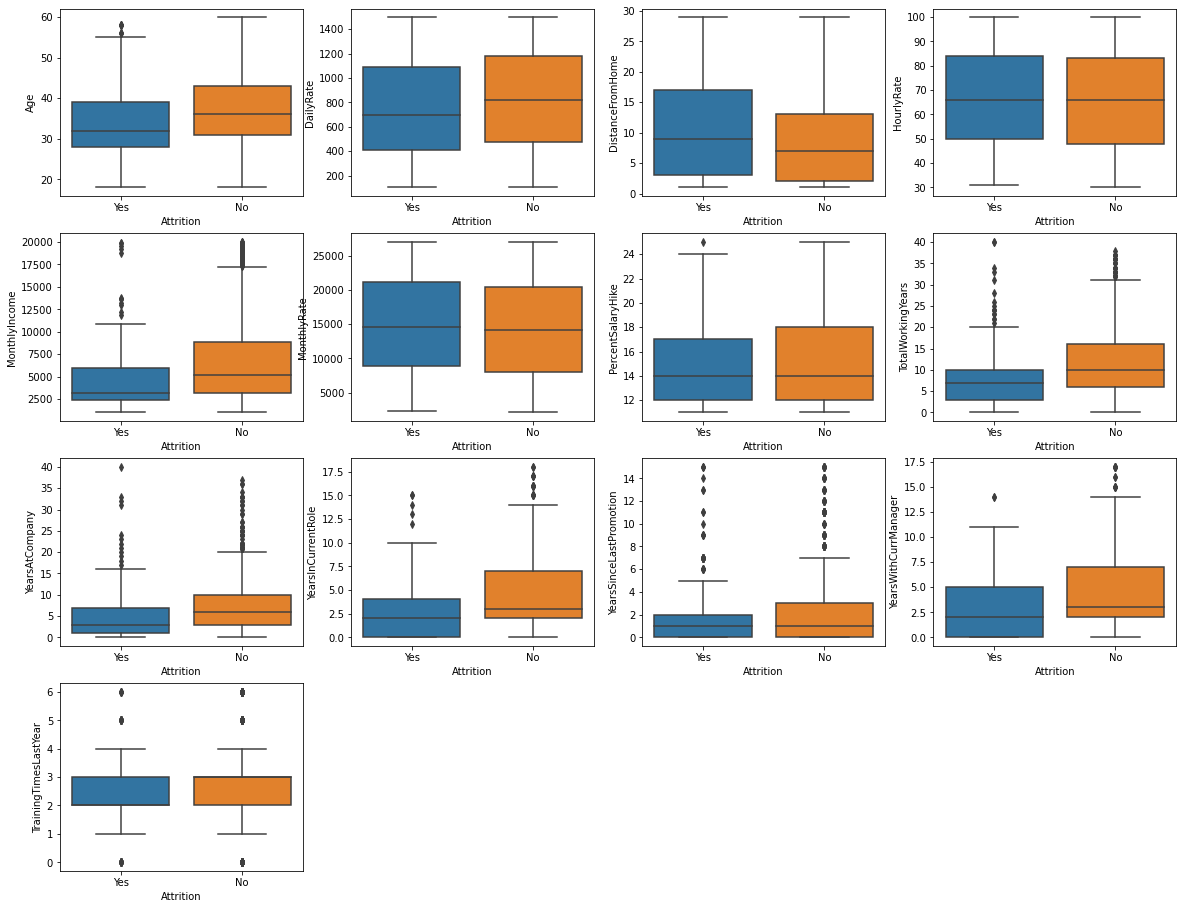

In [78]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_numerical.columns,1):
    plt.subplot(5,4,i)
    sns.boxplot(dataset["Attrition"],dataset_numerical[col])

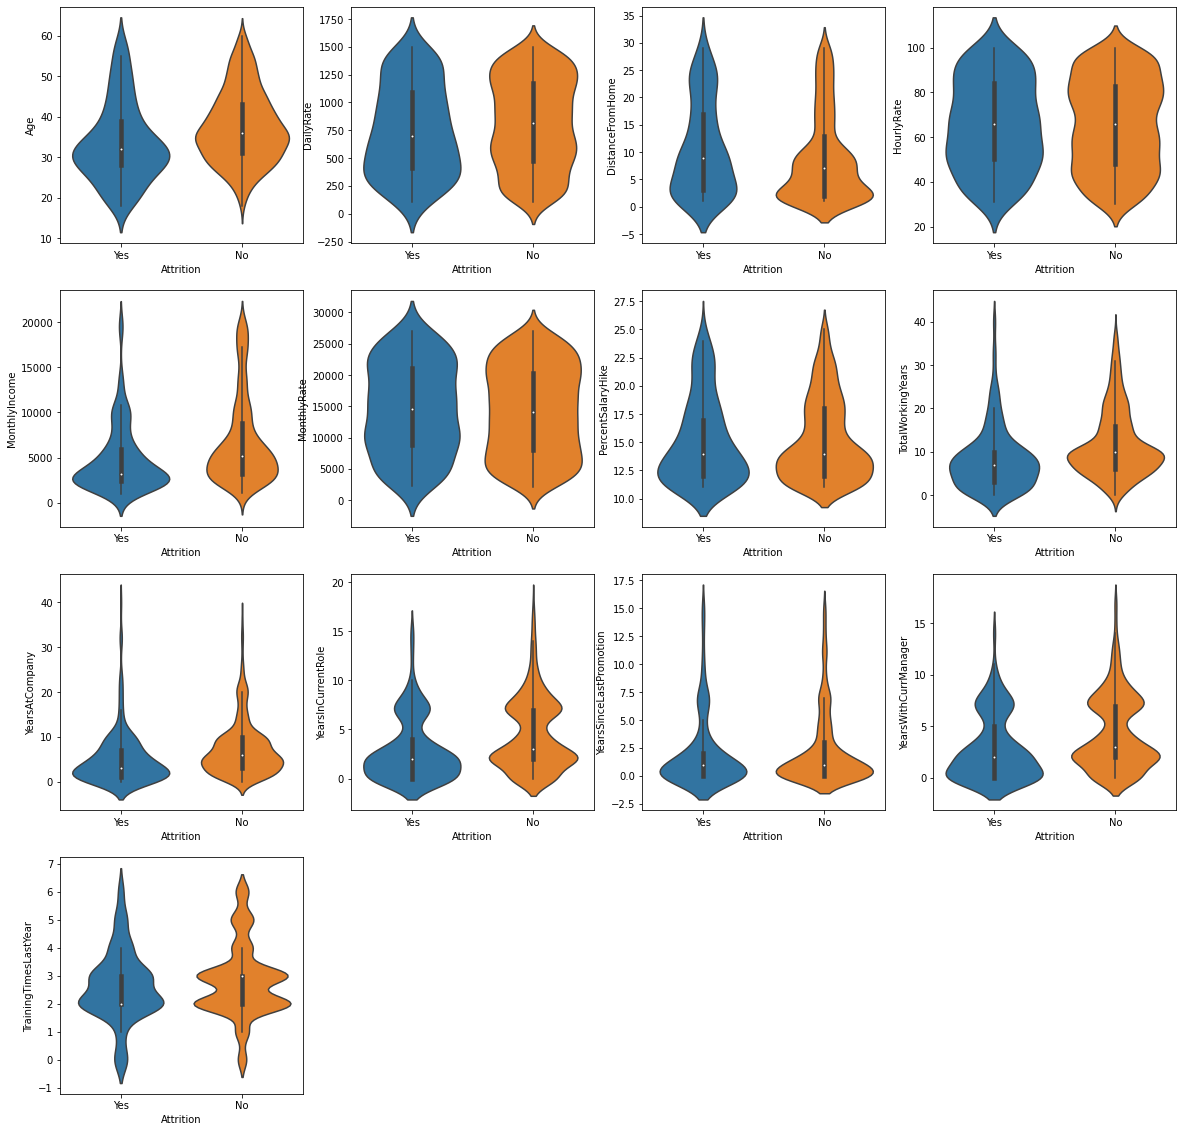

In [79]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_numerical.columns,1):
    plt.subplot(4,4,i)
    sns.violinplot(dataset["Attrition"],dataset_numerical[col])

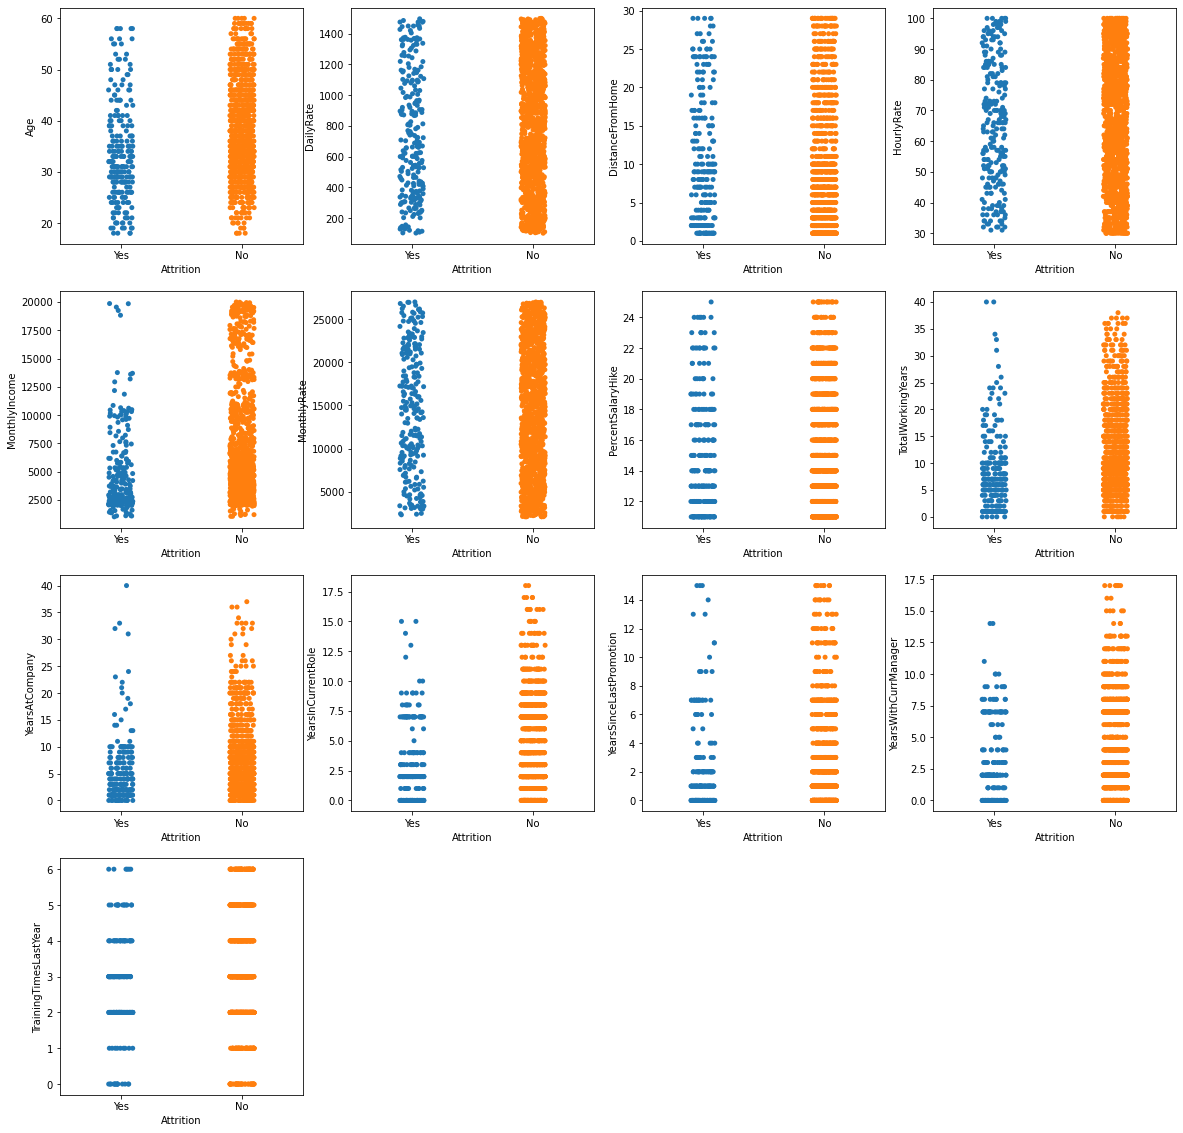

In [80]:
plt.figure(figsize=(20,20))
for i,col in enumerate(dataset_numerical.columns,1):
    plt.subplot(4,4,i)
    sns.stripplot(dataset["Attrition"],dataset_numerical[col])

# Data PreProcessing

In [201]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Medium,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,High,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Very High,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Very High,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,Low,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,High,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,Very High,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,Medium,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,Very High,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [202]:
dataset.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [203]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Medium,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,High,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Very High,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Very High,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,Low,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,High,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,Very High,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,Medium,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,Very High,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


# Categorical Data PreProcessing

In [204]:
categorical_features=[]
for col in dataset.columns:
    if(dataset[col].dtype=="object"):
        categorical_features.append(col)

In [205]:
dataset_categorical=dataset[categorical_features]

In [206]:
dataset_categorical

,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Medium,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,High,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Very High,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Very High,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Low,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,High,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Very High,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Medium,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Very High,Male,Sales Executive,Married,No


In [207]:
for col in dataset_categorical:
    print(col,":",dataset_categorical[col].unique())

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction : ['Medium' 'High' 'Very High' 'Low']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [208]:
dataset[dataset["JobRole"]=="Sales Executive"]["JobLevel"].unique()

array([2, 3, 4], dtype=int64)

In [209]:
dataset["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [210]:
for role in dataset["JobRole"].unique():
    print(role,":",dataset[dataset["JobRole"]==role]["JobLevel"].unique())

Sales Executive : [2 3 4]
Research Scientist : [2 1 3]
Laboratory Technician : [1 2 3]
Manufacturing Director : [3 2 4]
Healthcare Representative : [2 3 4]
Manager : [4 5 3]
Sales Representative : [1 2]
Research Director : [3 5 4]
Human Resources : [2 1 3]


In [211]:
dataset_categorical.drop("Over18",axis=1,inplace=True)

KeyError: "['Over18'] not found in axis"

In [212]:
dataset_categorical

,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Medium,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,High,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Very High,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Very High,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Low,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,High,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Very High,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Medium,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Very High,Male,Sales Executive,Married,No


In [213]:
oridinal_data=dataset_categorical[["EnvironmentSatisfaction"]]

In [214]:
oridinal_data

,EnvironmentSatisfaction
0,Medium
1,High
2,Very High
3,Very High
4,Low
...,...
1465,High
1466,Very High
1467,Medium
1468,Very High


In [215]:
nominal_data=dataset_categorical.drop(["EnvironmentSatisfaction"],axis=1)

In [216]:
nominal_data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [217]:
oridinal_data

,EnvironmentSatisfaction
0,Medium
1,High
2,Very High
3,Very High
4,Low
...,...
1465,High
1466,Very High
1467,Medium
1468,Very High


#Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'PHD'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

In [218]:
ordinal_map={
             "EnvironmentSatisfaction":{'Low':1,'Medium':2,'High':3,'Very High':4}}

In [219]:
ordinal_map["EnvironmentSatisfaction"]

{'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}

In [220]:
for col in oridinal_data.columns:
    oridinal_data[col]=oridinal_data[col].map(ordinal_map[col])

C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [221]:
oridinal_data

,EnvironmentSatisfaction
0,2
1,3
2,4
3,4
4,1
...,...
1465,3
1466,4
1467,2
1468,4


In [222]:
nominal_data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [223]:
nominal_data=pd.get_dummies(nominal_data,drop_first=True)

In [224]:
nominal_data

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [225]:
dataset_categorical=pd.concat([nominal_data,oridinal_data],axis=1)

In [226]:
dataset_categorical

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EnvironmentSatisfaction
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,3
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,4
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,4
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3
1466,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,4
1467,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,2
1468,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,4


# Numerical Data

In [227]:
numerical_features=[]

In [228]:
for col in dataset.columns:
    if(dataset[col].dtype!="object"):
        numerical_features.append(col)

In [229]:
numerical_data=dataset[numerical_features]

In [230]:
numerical_data

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


In [231]:
numerical_data

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


In [232]:
q1=numerical_data["MonthlyIncome"].describe()["25%"]
q3=numerical_data["MonthlyIncome"].describe()["75%"]

In [233]:
iqr=q3-q1

In [234]:
iqr

5468.0

In [235]:
lb=q1-(1.5*iqr)

In [236]:
ub=q3+(1.5*iqr)

In [237]:

for col in numerical_data:
    if(numerical_data[col].nunique()>10):
        q1=numerical_data[col].describe()["25%"]
        q3=numerical_data[col].describe()["75%"]
        iqr=q3-q1
        lb=q1-(1.5*iqr)
        ub=q3+(1.5*iqr)
        outlier_data=numerical_data[(numerical_data[col]<lb) | (numerical_data[col]>ub)]
        count=numerical_data[(numerical_data[col]<lb) | (numerical_data[col]>ub)].shape[0]
        p=count/1470*100
        
        if(p<4 and p>0):
            print("========================"+col+"===============================")
            #print(lb,ub)
            print("Count:",count )
            print("Percentage:",p )
            #display(outlier_data[col])

========================YearsInCurrentRole===============================
Count: 21
Percentage: 1.4285714285714286
========================YearsWithCurrManager===============================
Count: 14
Percentage: 0.9523809523809524


In [238]:
q1=numerical_data["TotalWorkingYears"].describe()["25%"]
q3=numerical_data["TotalWorkingYears"].describe()["75%"]

In [239]:
iqr=q3-q1

In [240]:
iqr

9.0

In [241]:
lb=q1-(1.5*iqr)

In [242]:
ub=q3+(1.5*iqr)

In [149]:
numerical_data[(numerical_data["TotalWorkingYears"]<lb)]["TotalWorkingYears"]

Series([], Name: TotalWorkingYears, dtype: int64)

In [150]:
numerical_data[(numerical_data["TotalWorkingYears"]>ub)]["TotalWorkingYears"]

18      31
62      29
85      37
98      38
105     30
        ..
1264    34
1301    37
1331    29
1374    29
1401    35
Name: TotalWorkingYears, Length: 63, dtype: int64

In [151]:
lb_dict={}.fromkeys(numerical_data[(numerical_data["TotalWorkingYears"]<lb)]["TotalWorkingYears"],lb)

In [152]:
ub_dict={}.fromkeys(numerical_data[(numerical_data["TotalWorkingYears"]>ub)]["TotalWorkingYears"],ub)

In [153]:
lb_dict.update(ub_dict)

In [154]:
lb_dict

{31: 28.5,
 29: 28.5,
 37: 28.5,
 38: 28.5,
 30: 28.5,
 40: 28.5,
 36: 28.5,
 34: 28.5,
 32: 28.5,
 33: 28.5,
 35: 28.5}

In [155]:
numerical_data["TotalWorkingYears"].replace(lb_dict)

0        8.0
1       10.0
2        7.0
3        8.0
4        6.0
        ... 
1465    17.0
1466     9.0
1467     6.0
1468    17.0
1469     6.0
Name: TotalWorkingYears, Length: 1470, dtype: float64

In [156]:
numerical_data

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


In [243]:
dataset_preprocessed=pd.concat([dataset_categorical,numerical_data],axis=1)

In [246]:
dataset_preprocessed.isnull().any()

Attrition_Yes                        False
BusinessTravel_Travel_Frequently     False
BusinessTravel_Travel_Rarely         False
Department_Research & Development    False
Department_Sales                     False
EducationField_Life Sciences         False
EducationField_Marketing             False
EducationField_Medical               False
EducationField_Other                 False
EducationField_Technical Degree      False
Gender_Male                          False
JobRole_Human Resources              False
JobRole_Laboratory Technician        False
JobRole_Manager                      False
JobRole_Manufacturing Director       False
JobRole_Research Director            False
JobRole_Research Scientist           False
JobRole_Sales Executive              False
JobRole_Sales Representative         False
MaritalStatus_Married                False
MaritalStatus_Single                 False
OverTime_Yes                         False
EnvironmentSatisfaction              False
Age        

# Split Dependent and Indepedndent Varibles

In [247]:
x=dataset_preprocessed.drop("Attrition_Yes",axis=1)

In [248]:
y=dataset_preprocessed["Attrition_Yes"]

In [249]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_Yes, Length: 1470, dtype: uint8

In [250]:
x

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,...,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,...,8,1,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,...,2,2,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,3,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,...,2,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,...,23,2,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,...,6,1,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,...,4,3,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,...,2,3,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


In [251]:
x_meta_data=x.columns

In [252]:
y.value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

In [253]:
(y.value_counts()/y.value_counts().sum())*100

0    83.877551
1    16.122449
Name: Attrition_Yes, dtype: float64

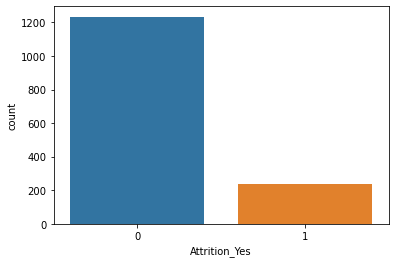

In [95]:
sns.countplot(y)

In [98]:
y.value_counts()/y.value_counts().sum()*100

0    83.877551
1    16.122449
Name: Attrition_Yes, dtype: float64

# Split data into Train and Test

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [257]:
X_train.isnull().any()

BusinessTravel_Travel_Frequently     False
BusinessTravel_Travel_Rarely         False
Department_Research & Development    False
Department_Sales                     False
EducationField_Life Sciences         False
EducationField_Marketing             False
EducationField_Medical               False
EducationField_Other                 False
EducationField_Technical Degree      False
Gender_Male                          False
JobRole_Human Resources              False
JobRole_Laboratory Technician        False
JobRole_Manager                      False
JobRole_Manufacturing Director       False
JobRole_Research Director            False
JobRole_Research Scientist           False
JobRole_Sales Executive              False
JobRole_Sales Representative         False
MaritalStatus_Married                False
MaritalStatus_Single                 False
OverTime_Yes                         False
EnvironmentSatisfaction              False
Age                                  False
DailyRate  

# Handle Imbalanced Data

## Under Sampling

In [105]:
y_train.value_counts()

0    978
1    198
Name: Attrition_Yes, dtype: int64

In [99]:
from imblearn.under_sampling import RandomUnderSampler

In [100]:
rus=RandomUnderSampler()

In [102]:
x_rus,y_rus=rus.fit_resample(X_train,y_train)

In [104]:
y_rus.value_counts()

1    198
0    198
Name: Attrition_Yes, dtype: int64

## Over Sampling

In [112]:
from imblearn.over_sampling import RandomOverSampler

In [113]:
ros=RandomOverSampler()

In [115]:
x_ros,y_ros=ros.fit_resample(X_train,y_train)

In [116]:
y_ros.value_counts()

1    978
0    978
Name: Attrition_Yes, dtype: int64

## SMOT

In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
sm=SMOTE(k_neighbors=5)

In [122]:
x_smo,y_smo=sm.fit_resample(X_train,y_train)

In [123]:
y_smo.value_counts()

1    978
0    978
Name: Attrition_Yes, dtype: int64

# Feature Scaling

In [258]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [259]:
X_train=sc.fit_transform(X_train)

In [260]:
X_test=sc.transform(X_test)

# Build Models

In [261]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [262]:
from sklearn.metrics import accuracy_score

In [263]:
y_pred = classifier.predict(X_test)

In [271]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [264]:
accuracy_score(y_test,y_pred)

0.891156462585034

In [265]:
y_pred_train=classifier.predict(X_train)

In [266]:
accuracy_score(y_train,y_pred_train)

0.8928571428571429

In [267]:
from sklearn.metrics import classification_report

In [268]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.67      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.88      0.89      0.88       294



In [270]:
cm

array([[248,   7],
       [ 25,  14]], dtype=int64)

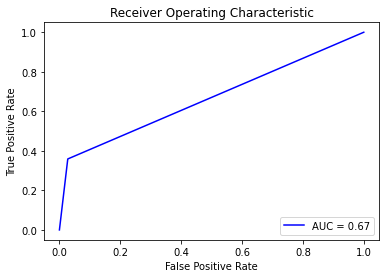

In [269]:
        

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [277]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

y_pred_knn = classifier_knn.predict(X_test)

In [278]:

accuracy_score(y_test,y_pred_knn)

0.8741496598639455

In [279]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.58      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.73      0.58      0.60       294
weighted avg       0.85      0.87      0.84       294



In [280]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_knn)
roc_auc_knn= metrics.auc(fpr, tpr)

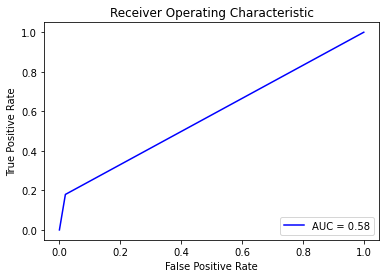

In [281]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [286]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear')
classifier_svc.fit(X_train, y_train)

y_pred_svc = classifier_svc.predict(X_test)

import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_svc)
roc_auc_svc = metrics.auc(fpr, tpr)


from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

y_pred_nb = classifier_nb.predict(X_test)

import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_nb)
roc_nb = metrics.auc(fpr, tpr)

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

y_pred_dt = classifier_dt.predict(X_test)

import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dt)
roc_auc_dt = metrics.auc(fpr, tpr)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion="entropy",bootstrap=True,random_state=42)
rf.fit(X_train, y_train)

y_pred_rf=rf.predict(X_test)

import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rf)
roc_auc_rf = metrics.auc(fpr, tpr)

from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=10,reg_alpha=0.5)
xgb.fit(X_train, y_train)

y_pred_xgb=xgb.predict(X_test)

import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = metrics.auc(fpr, tpr)


algorithms_names=["LR","KNN","Linear SVM","NB","DT","RF","XGB"]


auc_scores=[roc_auc,roc_auc_knn,roc_auc_svc,roc_nb,roc_auc_dt,roc_auc_rf,roc_auc_xgb]

In [287]:
auc_scores

[0.665761689291101,
 0.5799396681749622,
 0.7061840120663649,
 0.680392156862745,
 0.5487179487179488,
 0.5512820512820513,
 0.5484162895927601]

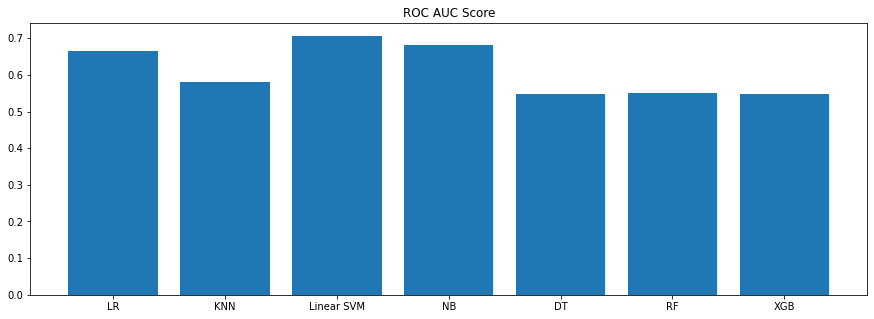

In [288]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.title('ROC AUC Score')
plt.bar(algorithms_names, auc_scores)
plt.show()